In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the dataset
DATASET_COLUMNS=['tweet_id','sentiment','content']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/tweet_emotions.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(15)

,tweet_id,sentiment,content
37475,1753498230,surprise,@ALOliver i bet they did some people have no ...
16929,1965478394,happiness,"@mysolis Aw, sorry ur day sucked! Did u see m..."
26435,1695409181,neutral,http://twitpic.com/4jhp8 - Waitin on them 2 te...
35936,1753215791,happiness,Justin Timberlake and Leonard Nimoy? And a Dic...
27890,1695963321,happiness,@atomicfern just made my day: http://tinyurl.c...
19988,1966438620,neutral,@1995shand not quite as much...hmmm products i...
14886,1964671218,hate,crap! tying run is on 2nd! let's hold em' Rai...
32731,1752384224,neutral,round 2
32032,1752158239,happiness,"@clairezee86 fo sho, im down"
18919,1966109179,sadness,@TomCopestake I'm sorry. You'll get there don...


In [3]:
df.head()

,tweet_id,sentiment,content
0,tweet_id,sentiment,content
1,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
2,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
3,1956967696,sadness,Funeral ceremony...gloomy friday...
4,1956967789,enthusiasm,wants to hang out with friends SOON!


In [4]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [5]:
print('length of data is', len(df))

length of data is 40001


In [6]:
df. shape

(40001, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40001 entries, 0 to 40000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40001 non-null  object
 1   sentiment  40001 non-null  object
 2   content    40001 non-null  object
dtypes: object(3)
memory usage: 937.6+ KB


In [9]:
df.dtypes

tweet_id     object
sentiment    object
content      object
dtype: object

In [10]:
np.sum(df.isnull().any(axis=1))

0

In [11]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   40001


In [12]:
df['tweet_id'].unique()

array(['tweet_id', '1956967341', '1956967666', ..., '1753919005',
       '1753919043', '1753919049'], dtype=object)

In [13]:
df['tweet_id'].nunique()

40001

DATA-PREPROCESSING

In [18]:
data=df[['sentiment','content']]

In [19]:
data['sentiment'] = data['sentiment'].replace(4,1)

<ipython-input-19-85226499ea73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].replace(4,1)


In [20]:
data['sentiment'].unique()

array(['sentiment', 'empty', 'sadness', 'enthusiasm', 'neutral', 'worry',
       'surprise', 'love', 'fun', 'hate', 'happiness', 'boredom',
       'relief', 'anger'], dtype=object)

In [21]:
data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]

In [22]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [23]:
dataset = pd.concat([data_pos, data_neg])

In [24]:
dataset['content']=dataset['content'].str.lower()
dataset['content'].tail()

Series([], Name: content, dtype: object)

In [25]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [26]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(content):
    return " ".join([word for word in str(content).split() if word not in STOPWORDS])
dataset['content'] = dataset['content'].apply(lambda text: cleaning_stopwords(text))
dataset['content'].head()

Series([], Name: content, dtype: object)

In [27]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['content']= dataset['content'].apply(lambda x: cleaning_punctuations(x))
dataset['content'].tail()

Series([], Name: content, dtype: object)

In [28]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['content'] = dataset['content'].apply(lambda x: cleaning_repeating_char(x))
dataset['content'].tail()

Series([], Name: content, dtype: object)

In [29]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['content'] = dataset['content'].apply(lambda x: cleaning_URLs(x))
dataset['content'].tail()

Series([], Name: content, dtype: object)

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['content'] = dataset['content'].apply(lambda x: cleaning_numbers(x))
dataset['content'].tail()

Series([], Name: content, dtype: object)

In [31]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['content'] = dataset['content'].apply(tokenizer.tokenize)
dataset['content'].head()

Series([], Name: content, dtype: object)

In [32]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['content']= dataset['content'].apply(lambda x: stemming_on_text(x))
dataset['content'].head()

Series([], Name: content, dtype: object)

In [33]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['content'] = dataset['content'].apply(lambda x: lemmatizer_on_text(x))
dataset['content'].head()

Series([], Name: content, dtype: object)

In [34]:
X=data.content
y=data.sentiment

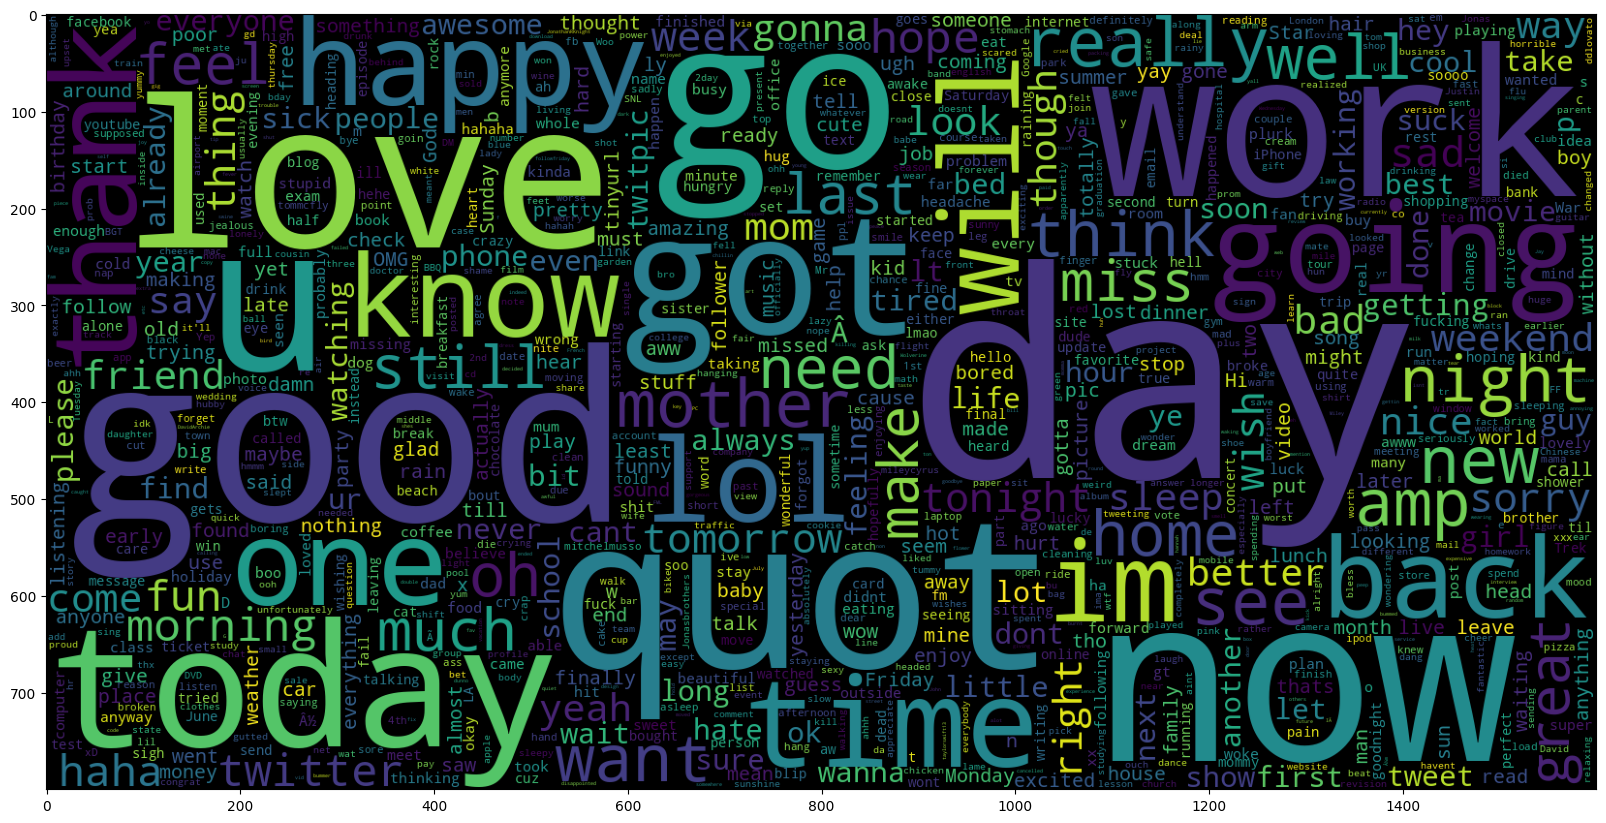

In [35]:
data_neg = data['content'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [38]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [40]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
#print('No. of feature_words: ', len(vectoriser.get_feature_names()))

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [41]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [50]:
def model_Evaluate(model):
# Predict values for Test dataset

y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

IndentationError: expected an indented block after function definition on line 1 (<ipython-input-50-f109ed9ca2b4>, line 3)

In [51]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [53]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)